# Set up

In [16]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import watermark


In [ ]:
# set plotting theme
sns.set_theme(style="whitegrid", context="paper")

In [3]:
# load raw data
df = pd.read_csv('../data/raw/rawdata_new.csv')

# Scatterplot: Arable land vs. livestock by farm type

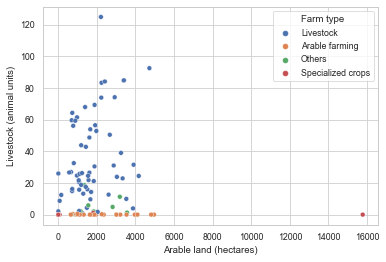

In [46]:
# plot land vs. livestock
plot_land_vs_livestock = sns.scatterplot(data=df, x='arable_land', y='animal_unit', hue='farmtype')
plot_land_vs_livestock.set(xlabel='Arable land (hectares)', ylabel='Livestock (animal units)')
plt.legend(title='Farm type')

# save figure
plt.savefig('../figures/plot_land_vs_livestock.png', dpi=300)

# Barplot: Implemented response by Mitigation category and measure

In [88]:
# create long dataframe of measures with id, measure, and response columns
measure_columns = ['legum', 'conc', 'add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr']
measure_df = pd.melt(df, id_vars='id', value_vars=measure_columns, var_name='measure', value_name='response')

# map measure abbreviations to names
measure_names = {'legum':'Legumes concentrate',
    'conc':'Feed concentrate',
    'add':'Feed additive', 'lact':'Lactation period',
    'breed':'Cattle breed',
    'covman':'Cover manure',
    'comp':'Compost manure',
    'drag':'Draghose',
    'cov':'Cover crop',
    'plough':'No plough',
    'solar':'Solar panel',
    'biog':'Biogas',
    'ecodr':'Ecodrive'}
measure_df['measure'] = measure_df['measure'].map(measure_names)

# join farmtype to measures dataframe
farm_df = df[['id', 'farmtype']]
farm_df.set_index('id', inplace=True)
measure_df = measure_df.join(farm_df, on='id')
measure_df.drop(columns=['id'], inplace=True)

# add measure category column to measures dataframe
measure_categories = {'Legumes concentrate':'Livestock',
    'Feed concentrate':'Livestock',
    'Feed additive':'Livestock',
    'Lactation period':'Livestock',
    'Cattle breed':'Livestock',
    'Cover manure':'Livestock',
    'Compost manure':'Livestock',
    'Draghose':'Crop production',
    'Cover crop':'Crop production',
    'No plough':'Crop production',
    'Solar panel':'Energy',
    'Biogas':'Energy',
    'Ecodrive':'Energy'}
measure_df['category'] = measure_df['measure'].map(measure_categories)

# count records for each measure x response
count_measure_df = measure_df.groupby(['category','measure', 'farmtype', 'response']).size().reset_index()
count_measure_df.rename(columns={0:'response_count'}, inplace=True)

# save vis data
count_measure_df.to_csv('../data/processed/vis_data.csv')

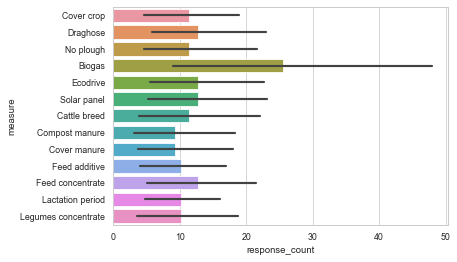

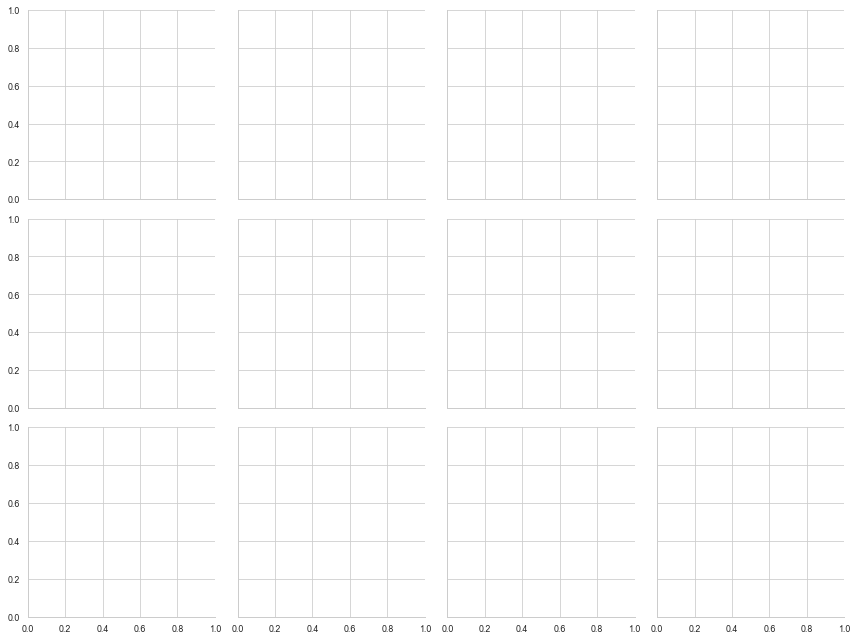

In [101]:
sns.barplot(data=count_measure_df, x='response_count', y='measure')


ValueError: Could not interpret value `response_count` for parameter `x`

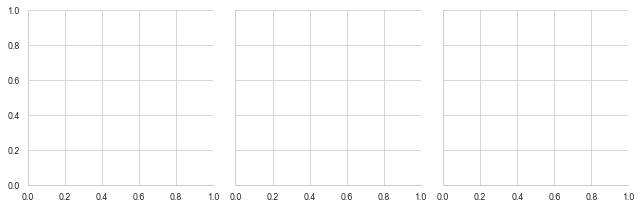

In [105]:
g = sns.FacetGrid(count_measure_df, col="category")
g.map(sns.scatterplot, x='response_count', y='measure', hue='response')

In [106]:
import altair as alt
alt.Chart(mitigation_df).mark_bar().encode(
    x='count(implemented)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='implemented:N',
    column='farmtype'
)

alt.Chart(...)

# Version details

In [7]:
%load_ext watermark
%watermark

Last updated: 2021-12-15T16:17:06.881187-08:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [8]:
%watermark -iv

matplotlib: 3.3.2
sys       : 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
watermark : 2.2.0
pandas    : 1.2.0
altair    : 4.1.0
seaborn   : 0.11.1

